# Unit 2: Lesson 4: Drill: Multivariable Regression: New York Crime

Eva Rubin

October 2018

In [241]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [224]:
#plt.rcParams['figure.figsize'] = (50.0, 20.0)
#plt.rcParams.update({'font.size': 22})

In [211]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
df_orig = pd.read_csv(data_path, delimiter= ',', header=None)

In [212]:
# Look at structure of df
df_orig.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Table 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3


In [213]:
df_orig.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [214]:
# Rename columns
df_orig.rename(columns={0: 'city', 1: 'pop_size', 2: 'violent_crime', 3: 'murder_manslaughter',
       4: 'rape_1', 5: 'rape_2', 6: 'robbery', 7: 'aggravated_assault', 8: 'property_crime', 
       9: 'burglary', 10: 'larceny_theft', 11: 'mv_theft', 12: 'arson_3'}, inplace=True)

df_orig.columns


Index(['city', 'pop_size', 'violent_crime', 'murder_manslaughter', 'rape_1',
       'rape_2', 'robbery', 'aggravated_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mv_theft', 'arson_3'],
      dtype='object')

In [215]:
# create new df copy and Remove rape_1 column and remove first 5 unwanted rows and last 3 unwanted rows.
df = df_orig.drop('rape_1', axis=1).drop(df_orig.index[0:5]).drop(df_orig.index[-3:]).copy()

In [216]:
df.head()

,city,pop_size,violent_crime,murder_manslaughter,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [217]:
# Create new features: pop_size squared, murder to categorical, robbery to catgorical

#Pop size squared:
# Remove commas in pop size numbers
df['pop_size'] = df['pop_size'].str.replace(',', '')

# Remove commas in numbers
df['robbery'] = df['robbery'].str.replace(',', '')

In [218]:
# Convert type to int (from string)
df['pop_size'] = df['pop_size'].astype(int)

In [219]:
# Feature 1: feature_pop_size_squared
df['feature_pop_size_squared'] = df['pop_size'] * df['pop_size']

In [220]:
# Create new features: murder to categorical, robbery to catgorical

# Convert type to int
df['murder_manslaughter'] = df['murder_manslaughter'].astype(int)

# Convert type to int
df['robbery'] = df['robbery'].astype(int)

In [221]:
def func_convert_to_categorical(x):
    if x == 0:
        return 0
    else:
        return 1

df['murder_manslaughter_cat'] = df['murder_manslaughter'].apply(func_convert_to_categorical)

df['robbery_cat'] = df['robbery'].apply(func_convert_to_categorical)

df

,city,pop_size,violent_crime,murder_manslaughter,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3,feature_pop_size_squared,murder_manslaughter_cat,robbery_cat
5,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321,0,0
6,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929,0,0
7,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,8099716,0,0
8,Albany,97956,791,8,30,227,526,"4,090",705,"3,243",142,NaN,9595377936,1,1
9,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN,40806544,0,1
10,Alfred Village,4089,5,0,0,3,2,46,10,36,0,NaN,16719921,0,1
11,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0,3171961,0,0
12,Amherst Town,118296,107,1,7,31,68,"2,118",204,"1,882",32,3,13993943616,1,1
13,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1,90611361,0,1
14,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0,330585124,0,1


## Graph two variables: murder_manslaughter and robbery

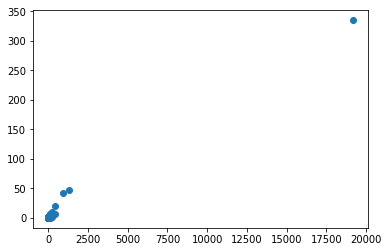

In [258]:
# Data to plot

# Plot murder_manslaughter and robbery data
y = df['murder_manslaughter']
x = df['robbery']

plt.scatter(x, y);

## Clear outliers for Robbery and Murder_Manslaughter

In [264]:
df['robbery'].sort_values(ascending=False).head()

221    19170
40      1322
277      918
315      400
351      390
Name: robbery, dtype: int64

In [265]:
df['murder_manslaughter'].sort_values(ascending=False).head()

221    335
40      47
277     42
315     21
145     10
Name: murder_manslaughter, dtype: int64

## Outliers appear to fit the line

#### Given the relatively small sample but apparent relationship between the variables, outliers for this sample might not be outliers with a larger sample.

Coefficients: 
 [[0.01763032]]

Intercept: 
 [0.28080076]


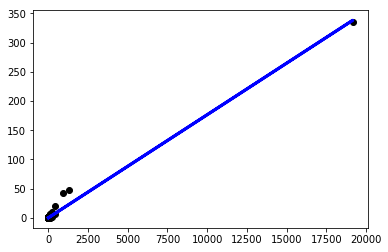

In [266]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.  Use pd.DataFrame() around the column you're looking to convert
# Otherwise, you get errors related to df vs. pandas series

y_regr = pd.DataFrame(df['murder_manslaughter'])
x_regr = pd.DataFrame(df['robbery'])

regr.fit(x_regr, y_regr)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print()
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x_regr, y_regr, color='black')
plt.plot(x_regr, regr.predict(x_regr), color='blue', linewidth=3)
plt.show()